In [225]:
import numpy as np
from scipy.spatial.distance import cdist

def HCA(fitness, change):
    pass

def distances(samples, distance=lambda x,y: np.sum(np.abs(x-y))):
    ret = [0 for i in range(samples.shape[1])]
    for i in range(samples.shape[1]):
        ret[i] = np.array([np.sum(list(map(distance, samples[:,i], samples[:,j]))) for j in range((samples.shape[1]))])
    return np.array(ret)
def local_fitness(order, dists, row, col):
    directions = ((1,1), (1,0), (0,1), (1,-1), (0,-1), (-1,1), (-1,0), (-1,-1))
    ret = 0
    for x0, y0 in directions:
        if    (row + x0 < 0 or row + x0 >= order.shape[0]
            or col + y0 < 0 or col + y0 >= order.shape[1]):
            continue
        ret += dists[order[row + x0, col + y0], order[row, col]]
    return ret
def fitness(order, dists, rows, columns):
    ret = 0
    order = np.array(order).reshape(rows, columns)    
    for i in range(rows):
        for j in range(columns):
            ret += local_fitness(order, dists, i, j)
    return ret,

def generate_samples(n_samples, dimensions, base_params=None, noise_var=1):
    if base_params==None:
        base_params = (dimensions//10 )+ 1
    samples = []
    base_samples = []
    distances = []
    labels = []
    zeros = np.zeros(base_params)
    corrs = np.random.normal(0,1, base_params)
    corrs_with = np.random.randint(0, base_params, size=dimensions)
    for i in range(n_samples):
        sample_base = np.random.normal(0,1, base_params)
        base_samples.append(sample_base)
        sample = np.array([corrs[i]*sample_base[i] for i in corrs_with])
        distances.append(np.sum(np.square(zeros-sample_base)))
        samples.append(sample)
    quater1 = np.quantile(distances,0.25)
    quater3 = np.quantile(distances,0.75)
    for i in range(n_samples):
        labels.append(
                distances[i]+np.random.normal(0, noise_var) > quater1
            and
                distances[i]+np.random.normal(0, noise_var) < quater3)
    return np.array(samples), np.array(labels)
    


In [173]:
fitness(np.arange(0,81), ds, 9,9)

49246.16384573888

In [226]:
SIDE_SIZE = 30
print("Generating...")
samples, labels = generate_samples(1000, SIDE_SIZE**2, noise_var=1)
print("Calculating distances...")
dists =distances(samples)
print("Done")

Generating...
Calculating distances...


C:\Users\souku\AppData\Local\Temp\ipykernel_21228\3383631305.py:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "distances" failed type inference due to: Internal error at <numba.core.typeinfer.ArgConstraint object at 0x000001C985EB38E0>.
Cannot determine Numba type of <class 'function'>
During: typing of argument at C:\Users\souku\AppData\Local\Temp\ipykernel_21228\3383631305.py (9)
Enable logging at debug level for details.

File "..\..\..\AppData\Local\Temp\ipykernel_21228\3383631305.py", line 9:
<source missing, REPL/exec in use?>

  @nb.jit
C:\Users\souku\AppData\Local\Temp\ipykernel_21228\3383631305.py:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "distances" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "..\..\..\AppData\Local\Temp\ipykernel_21228\3383631305.py", line 10:
<source missing, REPL/exec in u

RuntimeError: Failed in object mode pipeline (step: object mode backend)
LLVM IR parsing error
<string>:3389:50: error: expected type
  %".2937" = call i8* @"PyLong_FromSsize_t"(i64 (slice(None, None, None), None))
                                                 ^


In [199]:
import array
import random
import numpy as np
import math

from deap import algorithms
from deap import base
from deap import creator
from deap import tools


IND_SIZE = SIDE_SIZE*SIDE_SIZE
rows=SIDE_SIZE
columns=SIDE_SIZE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", lambda x: fitness(x, dists, rows, columns))
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=400, 
                               stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	300   	60191.6	1942.43	54995.1	65117.7
1  	181   	58964.6	1695.44	54748.1	64200.8
2  	172   	58039.4	1771.74	52541.2	62741.3
3  	170   	57519.5	2144.58	52541.2	63252  
4  	182   	57066.3	2367.78	52223.3	64384  
5  	194   	56534.5	2411.52	50698.3	64303.3
6  	187   	55876.6	2322.45	49804.2	63022.9
7  	164   	55198.9	2476.05	49047.6	62988.2
8  	198   	54921.7	2634.94	48999.5	62839  
9  	178   	54450.6	2736.29	48524.7	63352.8
10 	179   	53873.4	2882.59	48524.7	63292.1
11 	171   	53548.1	2856.58	48524.7	61478.6
12 	166   	52775  	2666.09	47379.8	59989.9
13 	184   	51923.5	2424.71	47588.6	62204.8
14 	181   	51599.9	2572.79	47463.9	62550  
15 	182   	51540.3	2815.3 	45590.4	60136.6
16 	187   	51299  	2878.81	45237.9	60729.2
17 	185   	50952.4	2872.24	44951.2	58045.5
18 	172   	50346.2	3077.28	44951.2	62661.7
19 	180   	49853.4	2767.9 	44951.2	59797  
20 	145   	49070.7	2611.79	43205.2	58455.5
21 	195   	48521.1	2560.94	44549.4	56855.5
22 	172   	

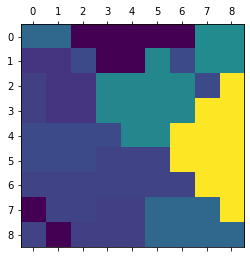

In [220]:
plt.matshow(samples[:,np.array(hof.items).reshape(SIDE_SIZE**2)][0].reshape((SIDE_SIZE,SIDE_SIZE)))

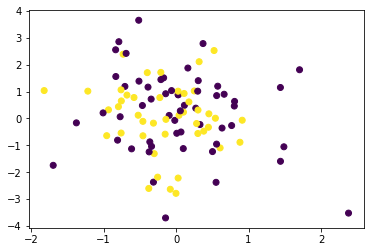

In [152]:
import matplotlib.pyplot as plt
samples, labels = generate_samples(100, 81, noise_var=1)
plt.scatter(samples[:,0], samples[:,1], c=labels)
plt.show()

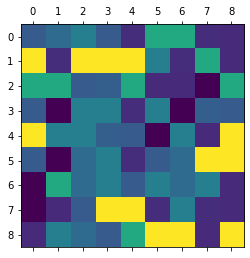

In [160]:
plt.matshow(distances(samples))
plt.show()

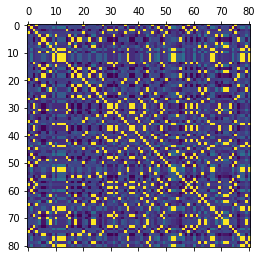

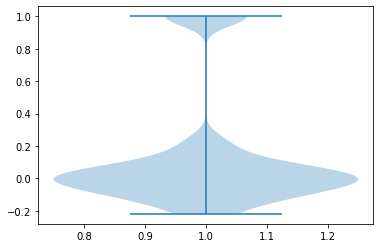

In [158]:
cm = np.corrcoef(samples.T)
plt.matshow(cm)
plt.show()
b = cm.flatten()
plt.violinplot(b)
plt.show()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8


IndexError: index 9 is out of bounds for axis 1 with size 9